# Importing all the required libraries

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import re
from sklearn.model_selection import learning_curve
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/IMDB/IMDB Dataset.csv")

Mounted at /content/drive


# Feature Extraction from the dataset
Converting the feature 'review' into a sparse matrix with TFIDF values for each word.

In [16]:
def preprocess(text):
    words = re.findall(r"\b[a-z]+\b", str(text).lower())
    return " ".join(words)

x=data['review'].apply(preprocess)
y=data['sentiment'].map({'positive':1,'negative':0})
X_train,X_test,Y_train,Y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
tfidf = TfidfVectorizer(max_features=5000,stop_words='english',ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print(X_train_tfidf.toarray()[:5])
print(X_test_tfidf.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# MODEL 1 - Logistic regression

I have used normal logistic regression model to classify the data into either positive or negative based on the Weights for each of the feature and the value of the feature.

In [7]:
Lr_model=LogisticRegression(max_iter=1000)
Lr_model.fit(X_train_tfidf,Y_train)
Lr_pred=Lr_model.predict(X_test_tfidf)
print("Linear Regression Model")
print("Accuracy:",accuracy_score(Y_test,Lr_pred))
print("Precision:", precision_score(Y_test, Lr_pred))
print("Recall   :", recall_score(Y_test, Lr_pred))
print("F1-score :", f1_score(Y_test, Lr_pred))
print("\nClassification Report:\n", classification_report(Y_test, Lr_pred))


Linear Regression Model
Accuracy: 0.8912
Precision: 0.884887839433294
Recall   : 0.8994
F1-score : 0.8920849037889308

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Confusion Matrix
It tells us about the exact place where our model underperformed and where it performed well.

In the following confusion matrix that we got we can see that there are a lot of values in the **main diagonal of the matrix** which means our model has performed well.

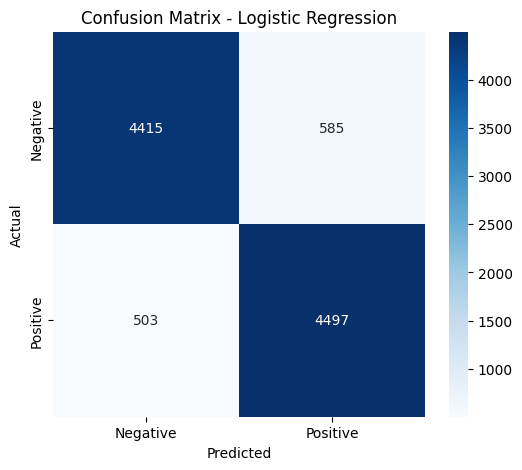

In [8]:
cm=confusion_matrix(Y_test,Lr_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

#Bar Graph

The following is a bar graph represeting the train and test accuracy.

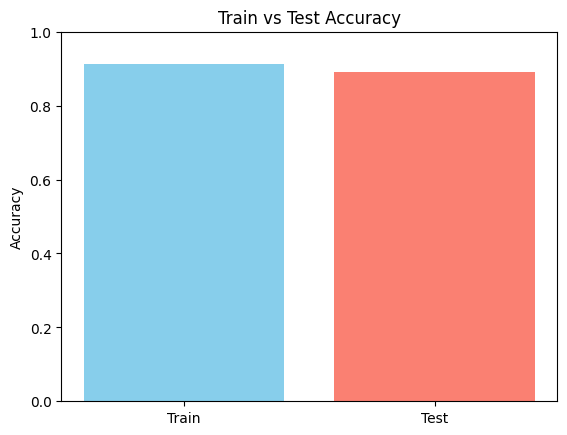

In [9]:
train_acc = accuracy_score(Y_train, Lr_model.predict(X_train_tfidf))
test_acc = accuracy_score(Y_test, Lr_pred)
plt.bar(["Train","Test"],[train_acc,test_acc],color=["skyblue","salmon"])
plt.ylim(0, 1)
plt.title("Train vs Test Accuracy")
plt.ylabel("Accuracy")
plt.show()

# Learning Curve


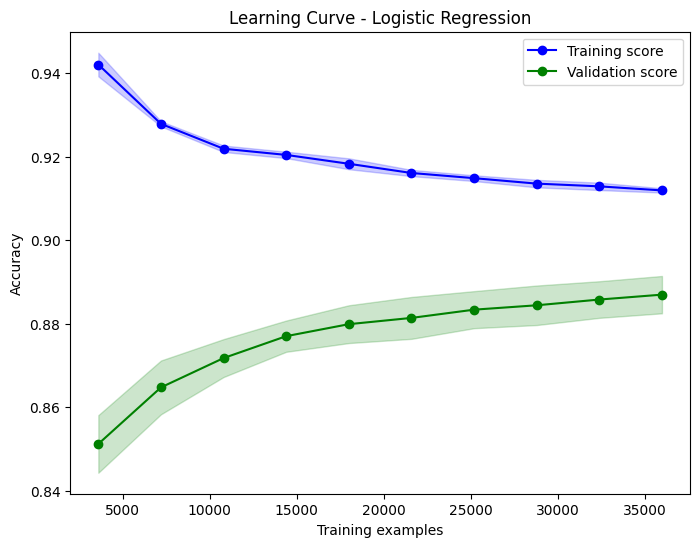

In [10]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_tfidf, Y_train, cv=10, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="green")

plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Logistic Regression")
plt.legend(loc="best")
plt.show()

# MODEL 2 - Support Vector Machine

Here I have used SVMs to classify the reviews as either positive or negative. In this particalur model, Ive used linear SVM to keep to training time for the model to be minial as the dataset is quite big.

In [13]:
svm_model = LinearSVC(C=1.0, max_iter=1000)
svm_model.fit(X_train_tfidf, Y_train)

svm_pred = svm_model.predict(X_test_tfidf)

print(" SVM Model ")
print("Accuracy:", accuracy_score(Y_test, svm_pred))
print("Precision:", precision_score(Y_test, svm_pred))
print("Recall   :", recall_score(Y_test, svm_pred))
print("F1-score :", f1_score(Y_test, svm_pred))
print("\nClassification Report:\n", classification_report(Y_test, svm_pred))


 SVM Model 
Accuracy: 0.8818
Precision: 0.878019801980198
Recall   : 0.8868
F1-score : 0.8823880597014926

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# Confusion Matrix

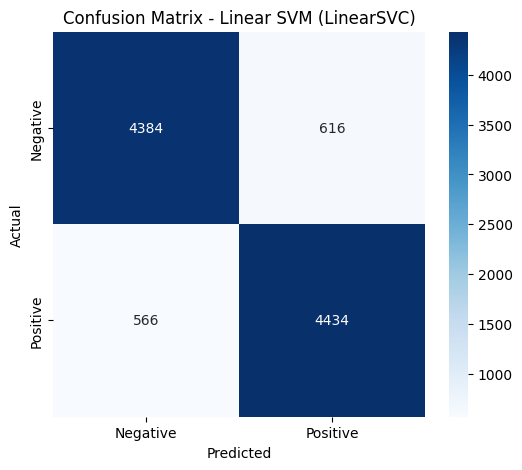

In [12]:
cm = confusion_matrix(Y_test, svm_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear SVM (LinearSVC)')
plt.show()

# Bar Graph

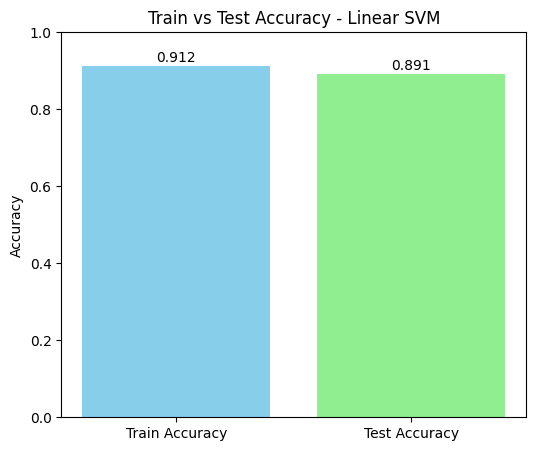

In [14]:
plt.figure(figsize=(6,5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_acc, test_acc], color=['skyblue','lightgreen'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy - Linear SVM")
for i, acc in enumerate([train_acc, test_acc]):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha='center')
plt.show()


# Learning Curve

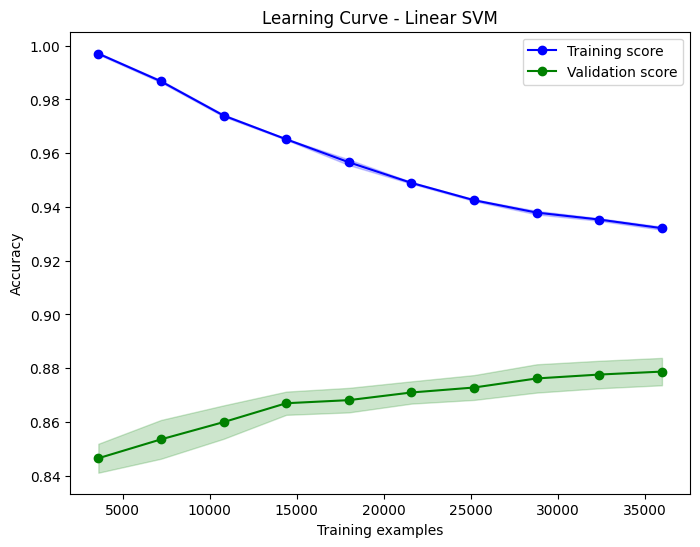

In [15]:
svm_model = LinearSVC()

train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train_tfidf, Y_train, cv=10, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
test_mean  = np.mean(test_scores, axis=1)
test_std   = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="green")

plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Linear SVM")
plt.legend(loc="best")
plt.show()